# Import dataset

In [4]:
# import libraries 
import numpy as np 
import pandas as pd
# import the data 
branddetails = pd.read_csv('BrandDetails.csv')
dataunits = pd.read_csv('BrandTotalUnits.csv')
datasales = pd.read_csv('BrandTotalSales.csv')


# 1. Merge Datasets and Effectively Link information
-  Months: string to datetime
-  Total Sales in `datasales` : 1) cut off the string; 2) convert to numeric

In [5]:
datasales.head()

Months            Brand      Total Sales ($)
0  09/2018      10x Infused         1,711.334232
1  09/2018  1964 Supply Co.   25,475.21594500000
2  09/2018      3 Bros Grow       120,153.644757
3  09/2018           3 Leaf  6,063.5297850000000
4  09/2018         350 Fire   631,510.0481550000

In [6]:
datasales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25279 entries, 0 to 25278
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Months           25279 non-null  object
 1   Brand            25279 non-null  object
 2   Total Sales ($)  25279 non-null  object
dtypes: object(3)
memory usage: 592.6+ KB


In [7]:
branddetails.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144977 entries, 0 to 144976
Data columns (total 25 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   State                144977 non-null  object 
 1   Channel              144977 non-null  object 
 2   Category L1          144977 non-null  object 
 3   Category L2          144977 non-null  object 
 4   Category L3          144245 non-null  object 
 5   Category L4          102618 non-null  object 
 6   Category L5          50135 non-null   object 
 7   Brand                144977 non-null  object 
 8   Product Description  144977 non-null  object 
 9   Total Sales ($)      144977 non-null  object 
 10  Total Units          144977 non-null  object 
 11  ARP                  144977 non-null  float64
 12  Flavor               7807 non-null    object 
 13  Items Per Pack       144977 non-null  int64  
 14  Item Weight          64454 non-null   object 
 15  Total THC        

In [8]:
#First convert our months to datetime
datasales['Months'] = pd.to_datetime(datasales['Months'])
#Total units is too large currently to convert to a float
#need to trim it first then convert to float
datasales['Total Sales ($)'] = datasales['Total Sales ($)'].apply(lambda x: x.replace(',', '')[:10])
datasales['Total Sales ($)'] = pd.to_numeric(datasales['Total Sales ($)'])
datasales=datasales.rename(columns={'Total Sales ($)':'Total Sales'})

datasales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25279 entries, 0 to 25278
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Months       25279 non-null  datetime64[ns]
 1   Brand        25279 non-null  object        
 2   Total Sales  25279 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 592.6+ KB


In [9]:
datasales.head()

Months            Brand   Total Sales
0 2018-09-01      10x Infused    1711.33423
1 2018-09-01  1964 Supply Co.   25475.21590
2 2018-09-01      3 Bros Grow  120153.64400
3 2018-09-01           3 Leaf    6063.52978
4 2018-09-01         350 Fire  631510.04800

In [10]:
datasales.describe()

Total Sales
count  2.527900e+04
mean   4.093729e+05
std    1.596024e+06
min    0.000000e+00
25%    1.390320e+04
50%    6.210080e+04
75%    2.473270e+05
max    4.036351e+07

# Create Data Frame
## Adding features  
- total sales of last month
- Rolling average of last three months
- Some important categories (one-hot encoding)

In [11]:
brands = datasales["Brand"].unique()
brands

array(['10x Infused', '1964 Supply Co.', '3 Bros Grow', ..., 'SyncSF',
       'Weed', 'Zanna'], dtype=object)

In [12]:
sales_res = pd.DataFrame(columns=['Months','Brand', 'Total Sales', 'Previous Month Sales', 'Rolling Average 3M','Inhaleables','Topicals','Ingestibles','All Accessories','Other Cannabis'])
    
for brand in brands:
    sales= datasales[datasales.Brand == brand]
    sales.loc[:,'Previous Month Sales'] = sales.loc[:,'Total Sales'].shift(1)
    sales.loc[:,'Rolling Average 3M'] = (sales.loc[:,'Total Sales'].shift(1) + sales.loc[:,'Total Sales'].shift(2) + sales.loc[:,'Total Sales'].shift(3))/3
    
    branddetails_1 = branddetails[branddetails.Brand == brand]
    value1 = 0
    value2 = 0
    value3 = 0
    value4 = 0
    value5 = 0

    if 'Inhaleables' in branddetails_1['Category L1'].values:
        value1 = 1
    if 'Topicals' in branddetails_1['Category L1'].values:
        value2 = 1
    if 'Ingestibles' in branddetails_1['Category L1'].values:
        value3 = 1
    if 'All Accessories' in branddetails_1['Category L1'].values:
        value4 = 1       
    if 'Other Cannabis' in branddetails_1['Category L1'].values:
        value5 = 1        

    sales['Inhaleables'] = value1
    sales['Topicals'] = value2
    sales['Ingestibles'] = value3
    sales['All Accessories'] = value4
    sales['Other Cannabis'] = value5

    sales = sales.dropna()      # drop the rows with null values
    sales_res=sales_res.append(sales)

E:\Anaconda\lib\site-packages\pandas\core\indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
E:\Anaconda\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)
C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveat

C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales['Inhaleables'] = value1
C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales['Topicals'] = value2
C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales['Inhaleables'] = value1
C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales['Topicals'] = value2
C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales['Inhaleables'] = value1
C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales['Topicals'] = value2
C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

E:\Anaconda\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)
C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales['Inhaleables'] = value1
C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead



C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales['Inhaleables'] = value1
C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales['Topicals'] = value2
C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

E:\Anaconda\lib\site-packages\pandas\core\indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
E:\Anaconda\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)
C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveat

E:\Anaconda\lib\site-packages\pandas\core\indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
E:\Anaconda\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)
C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveat

C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales['Inhaleables'] = value1
C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales['Topicals'] = value2
C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales['Inhaleables'] = value1
C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales['Topicals'] = value2
C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales['Inhaleables'] = value1
C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales['Topicals'] = value2
C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

E:\Anaconda\lib\site-packages\pandas\core\indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
E:\Anaconda\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)
C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveat

E:\Anaconda\lib\site-packages\pandas\core\indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
E:\Anaconda\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)
C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveat

C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales['Inhaleables'] = value1
C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales['Topicals'] = value2
C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

E:\Anaconda\lib\site-packages\pandas\core\indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
E:\Anaconda\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)
C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveat

C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales['Inhaleables'] = value1
C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales['Topicals'] = value2
C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales['Inhaleables'] = value1
C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales['Topicals'] = value2
C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales['Inhaleables'] = value1
C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales['Topicals'] = value2
C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

E:\Anaconda\lib\site-packages\pandas\core\indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
E:\Anaconda\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)
C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveat

C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales['Inhaleables'] = value1
C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales['Topicals'] = value2
C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales['Inhaleables'] = value1
C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales['Topicals'] = value2
C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales['Inhaleables'] = value1
C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales['Topicals'] = value2
C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales['Inhaleables'] = value1
C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales['Topicals'] = value2
C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales['Inhaleables'] = value1
C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales['Topicals'] = value2
C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales['Inhaleables'] = value1
C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales['Topicals'] = value2
C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

E:\Anaconda\lib\site-packages\pandas\core\indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
E:\Anaconda\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)
C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveat

C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales['Inhaleables'] = value1
C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales['Topicals'] = value2
C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

E:\Anaconda\lib\site-packages\pandas\core\indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
E:\Anaconda\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)
C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveat

C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales['Inhaleables'] = value1
C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales['Topicals'] = value2
C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

E:\Anaconda\lib\site-packages\pandas\core\indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
E:\Anaconda\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)
C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveat

E:\Anaconda\lib\site-packages\pandas\core\indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
E:\Anaconda\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)
C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveat

C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales['Inhaleables'] = value1
C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales['Topicals'] = value2
C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales['Inhaleables'] = value1
C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales['Topicals'] = value2
C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales['Inhaleables'] = value1
C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales['Topicals'] = value2
C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales['Inhaleables'] = value1
C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales['Topicals'] = value2
C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

E:\Anaconda\lib\site-packages\pandas\core\indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
E:\Anaconda\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)
C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveat

E:\Anaconda\lib\site-packages\pandas\core\indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
E:\Anaconda\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)
C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveat

C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales['Inhaleables'] = value1
C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales['Topicals'] = value2
C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales['Inhaleables'] = value1
C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales['Topicals'] = value2
C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales['Inhaleables'] = value1
C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales['Topicals'] = value2
C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales['Inhaleables'] = value1
C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales['Topicals'] = value2
C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales['Topicals'] = value2
C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales['Ingestibles'] = value3
C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

E:\Anaconda\lib\site-packages\pandas\core\indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
E:\Anaconda\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)
C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveat

C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales['Inhaleables'] = value1
C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales['Topicals'] = value2
C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales['Inhaleables'] = value1
C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales['Topicals'] = value2
C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

E:\Anaconda\lib\site-packages\pandas\core\indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
E:\Anaconda\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)
C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveat

E:\Anaconda\lib\site-packages\pandas\core\indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
E:\Anaconda\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)
C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveat

C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales['Inhaleables'] = value1
C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales['Topicals'] = value2
C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales['Inhaleables'] = value1
C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales['Topicals'] = value2
C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

E:\Anaconda\lib\site-packages\pandas\core\indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
E:\Anaconda\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)
C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveat

C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales['Inhaleables'] = value1
C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales['Topicals'] = value2
C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales['Inhaleables'] = value1
C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales['Topicals'] = value2
C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales['Inhaleables'] = value1
C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales['Topicals'] = value2
C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

E:\Anaconda\lib\site-packages\pandas\core\indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
E:\Anaconda\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)
C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveat

C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales['Inhaleables'] = value1
C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales['Topicals'] = value2
C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales['Inhaleables'] = value1
C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales['Topicals'] = value2
C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

E:\Anaconda\lib\site-packages\pandas\core\indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
E:\Anaconda\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)
C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveat

E:\Anaconda\lib\site-packages\pandas\core\indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
E:\Anaconda\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)
C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveat

C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales['Inhaleables'] = value1
C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales['Topicals'] = value2
C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

E:\Anaconda\lib\site-packages\pandas\core\indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
E:\Anaconda\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)
C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveat

C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales['Inhaleables'] = value1
C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales['Topicals'] = value2
C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales['Inhaleables'] = value1
C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales['Topicals'] = value2
C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales['Inhaleables'] = value1
C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales['Topicals'] = value2
C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales['Inhaleables'] = value1
C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales['Topicals'] = value2
C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales['Inhaleables'] = value1
C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales['Topicals'] = value2
C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales['Inhaleables'] = value1
C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales['Topicals'] = value2
C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales['Inhaleables'] = value1
C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales['Topicals'] = value2
C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

E:\Anaconda\lib\site-packages\pandas\core\indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
E:\Anaconda\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)
C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveat

C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales['Inhaleables'] = value1
C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales['Topicals'] = value2
C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales['Inhaleables'] = value1
C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales['Topicals'] = value2
C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales['Inhaleables'] = value1
C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales['Topicals'] = value2
C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

E:\Anaconda\lib\site-packages\pandas\core\indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
E:\Anaconda\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)
C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveat

C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales['Inhaleables'] = value1
C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales['Topicals'] = value2
C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales['Inhaleables'] = value1
C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales['Topicals'] = value2
C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales['Inhaleables'] = value1
C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales['Topicals'] = value2
C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales['Inhaleables'] = value1
C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales['Topicals'] = value2
C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales['Inhaleables'] = value1
C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales['Topicals'] = value2
C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales['Inhaleables'] = value1
C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales['Topicals'] = value2
C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales['Inhaleables'] = value1
C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales['Topicals'] = value2
C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

E:\Anaconda\lib\site-packages\pandas\core\indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
E:\Anaconda\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)
C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveat

E:\Anaconda\lib\site-packages\pandas\core\indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
E:\Anaconda\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)
C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveat

E:\Anaconda\lib\site-packages\pandas\core\indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
E:\Anaconda\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)
C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveat

E:\Anaconda\lib\site-packages\pandas\core\indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
E:\Anaconda\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)
C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveat

C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales['Inhaleables'] = value1
C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales['Topicals'] = value2
C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales['Inhaleables'] = value1
C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales['Topicals'] = value2
C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales['Topicals'] = value2
C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales['Ingestibles'] = value3
C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

E:\Anaconda\lib\site-packages\pandas\core\indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
E:\Anaconda\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)
C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveat

E:\Anaconda\lib\site-packages\pandas\core\indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
E:\Anaconda\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)
C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveat

C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales['Inhaleables'] = value1
C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales['Topicals'] = value2
C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales['Inhaleables'] = value1
C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales['Topicals'] = value2
C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales['Inhaleables'] = value1
C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales['Topicals'] = value2
C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales['Inhaleables'] = value1
C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales['Topicals'] = value2
C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales['Inhaleables'] = value1
C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales['Topicals'] = value2
C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales['Inhaleables'] = value1
C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales['Topicals'] = value2
C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales['Topicals'] = value2
C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales['Ingestibles'] = value3
C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales['Inhaleables'] = value1
C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales['Topicals'] = value2
C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales['Inhaleables'] = value1
C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales['Topicals'] = value2
C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales['Inhaleables'] = value1
C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales['Topicals'] = value2
C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales['Inhaleables'] = value1
C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales['Topicals'] = value2
C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales['Inhaleables'] = value1
C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales['Topicals'] = value2
C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales['Inhaleables'] = value1
C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales['Topicals'] = value2
C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

E:\Anaconda\lib\site-packages\pandas\core\indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
E:\Anaconda\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)
C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveat

C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales['Inhaleables'] = value1
C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales['Topicals'] = value2
C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

E:\Anaconda\lib\site-packages\pandas\core\indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
E:\Anaconda\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)
C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveat

C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales['Inhaleables'] = value1
C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales['Topicals'] = value2
C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales['Inhaleables'] = value1
C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales['Topicals'] = value2
C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales['Inhaleables'] = value1
C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales['Topicals'] = value2
C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

E:\Anaconda\lib\site-packages\pandas\core\indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
E:\Anaconda\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)
C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveat

C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales['Inhaleables'] = value1
C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales['Topicals'] = value2
C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales['Inhaleables'] = value1
C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales['Topicals'] = value2
C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

E:\Anaconda\lib\site-packages\pandas\core\indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
E:\Anaconda\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)
C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveat

C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales['Inhaleables'] = value1
C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales['Topicals'] = value2
C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

E:\Anaconda\lib\site-packages\pandas\core\indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
E:\Anaconda\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)
C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveat

C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales['Inhaleables'] = value1
C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales['Topicals'] = value2
C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales['Inhaleables'] = value1
C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales['Topicals'] = value2
C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

E:\Anaconda\lib\site-packages\pandas\core\indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
E:\Anaconda\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)
C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveat

C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales['Inhaleables'] = value1
C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales['Topicals'] = value2
C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales['Inhaleables'] = value1
C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales['Topicals'] = value2
C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

E:\Anaconda\lib\site-packages\pandas\core\indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
E:\Anaconda\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)
C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveat

E:\Anaconda\lib\site-packages\pandas\core\indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
E:\Anaconda\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)
C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveat

C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales['Inhaleables'] = value1
C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales['Topicals'] = value2
C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales['Inhaleables'] = value1
C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales['Topicals'] = value2
C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales['Inhaleables'] = value1
C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales['Topicals'] = value2
C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales['Inhaleables'] = value1
C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales['Topicals'] = value2
C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales['Inhaleables'] = value1
C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales['Topicals'] = value2
C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales['Inhaleables'] = value1
C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales['Topicals'] = value2
C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales['Inhaleables'] = value1
C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales['Topicals'] = value2
C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales['Inhaleables'] = value1
C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales['Topicals'] = value2
C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

E:\Anaconda\lib\site-packages\pandas\core\indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
E:\Anaconda\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)
C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveat

E:\Anaconda\lib\site-packages\pandas\core\indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
E:\Anaconda\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)
C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveat

E:\Anaconda\lib\site-packages\pandas\core\indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
E:\Anaconda\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)
C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveat

C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales['Inhaleables'] = value1
C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales['Topicals'] = value2
C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales['Inhaleables'] = value1
C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales['Topicals'] = value2
C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

E:\Anaconda\lib\site-packages\pandas\core\indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
E:\Anaconda\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)
C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveat

C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales['Inhaleables'] = value1
C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales['Topicals'] = value2
C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales['Inhaleables'] = value1
C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales['Topicals'] = value2
C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales['Inhaleables'] = value1
C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales['Topicals'] = value2
C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales['Inhaleables'] = value1
C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales['Topicals'] = value2
C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales['Inhaleables'] = value1
C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales['Topicals'] = value2
C:\Users\Kim\AppData\Local\Temp/ipykernel_73564/1677805756.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

In [13]:
sales_res.head(20)

Months            Brand    Total Sales  Previous Month Sales  \
1473 2018-12-01  1964 Supply Co.   11862.458300            5402.87306   
2004 2019-01-01  1964 Supply Co.    3999.035200           11862.45830   
2540 2019-02-01  1964 Supply Co.    2417.479970            3999.03520   
3096 2019-03-01  1964 Supply Co.    1607.563310            2417.47997   
3664 2019-04-01  1964 Supply Co.     292.135879            1607.56331   
1474 2018-12-01      3 Bros Grow  208424.645000          109432.45200   
2005 2019-01-01      3 Bros Grow  214650.825000          208424.64500   
2541 2019-02-01      3 Bros Grow  557059.818000          214650.82500   
3097 2019-03-01      3 Bros Grow  346319.611000          557059.81800   
3665 2019-04-01      3 Bros Grow  519579.324000          346319.61100   
4248 2019-05-01      3 Bros Grow  278252.378000          519579.32400   
4839 2019-06-01      3 Bros Grow  132809.898000          278252.37800   
5465 2019-07-01      3 Bros Grow   95303.780400          132809.89800   
6078 2019-08-01      3 Bros Grow  120435.066000           95303.78040   
6696 2019-09-01      3 Bros Grow  444813.781000          120435.06600   
7298 2019-10-01      3 Bros Grow  323920.510000          444813.78100   
7911 2019-11-01      3 Bros Grow  163786.306000          323920.51000   
8529 2019-12-01      3 Bros Grow  409535.828000          163786.30600   
9149 2020-01-01      3 Bros Grow  466658.723000          409535.82800   
9769 2020-02-01      3 Bros Grow  227941.631000          466658.72300   

      Rolling Average 3M Inhaleables Topicals Ingestibles All Accessories  \
1473        14830.434353           0        0           0               0   
2004        10292.848487           0        0           0               0   
2540         7088.122187           0        0           0               0   
3096         6092.991157           0        0           0               0   
3664         2674.692827           0        0           0               0   
1474       114172.753333           1        0           0               0   
2005       143596.420333           1        0           0               0   
2541       177502.640667           1        0           0               0   
3097       326711.762667           1        0           0               0   
3665       372676.751333           1        0           0               0   
4248       474319.584333           1        0           0               0   
4839       381383.771000           1        0           0               0   
5465       310213.866667           1        0           0               0   
6078       168788.685467           1        0           0               0   
6696       116182.914800           1        0           0               0   
7298       220184.209133           1        0           0               0   
7911       296389.785667           1        0           0               0   
8529       310840.199000           1        0           0               0   
9149       299080.881333           1        0           0               0   
9769       346660.285667           1        0           0               0   

     Other Cannabis  
1473              0  
2004              0  
2540              0  
3096              0  
3664              0  
1474              0  
2005              0  
2541              0  
3097              0  
3665              0  
4248              0  
4839              0  
5465              0  
6078              0  
6696              0  
7298              0  
7911              0  
8529              0  
9149              0  
9769              0

In [14]:
sales_res.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20734 entries, 1473 to 25208
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Months                20734 non-null  datetime64[ns]
 1   Brand                 20734 non-null  object        
 2   Total Sales           20734 non-null  float64       
 3   Previous Month Sales  20734 non-null  float64       
 4   Rolling Average 3M    20734 non-null  float64       
 5   Inhaleables           20734 non-null  object        
 6   Topicals              20734 non-null  object        
 7   Ingestibles           20734 non-null  object        
 8   All Accessories       20734 non-null  object        
 9   Other Cannabis        20734 non-null  object        
dtypes: datetime64[ns](1), float64(3), object(6)
memory usage: 1.7+ MB


# 2.Time Series Feature Extraction Plan

In [15]:
# Adding the time series features
sales_res['year'] = sales_res['Months'].dt.year
sales_res['month'] = sales_res['Months'].dt.month
sales_res['quarter'] = sales_res['Months'].dt.quarter
sales_res.head()

Months            Brand   Total Sales  Previous Month Sales  \
1473 2018-12-01  1964 Supply Co.  11862.458300            5402.87306   
2004 2019-01-01  1964 Supply Co.   3999.035200           11862.45830   
2540 2019-02-01  1964 Supply Co.   2417.479970            3999.03520   
3096 2019-03-01  1964 Supply Co.   1607.563310            2417.47997   
3664 2019-04-01  1964 Supply Co.    292.135879            1607.56331   

      Rolling Average 3M Inhaleables Topicals Ingestibles All Accessories  \
1473        14830.434353           0        0           0               0   
2004        10292.848487           0        0           0               0   
2540         7088.122187           0        0           0               0   
3096         6092.991157           0        0           0               0   
3664         2674.692827           0        0           0               0   

     Other Cannabis  year  month  quarter  
1473              0  2018     12        4  
2004              0  2019      1        1  
2540              0  2019      2        1  
3096              0  2019      3        1  
3664              0  2019      4        2

In [16]:
sales_res.to_csv('dataFrame.csv', index=True) 

In [17]:
sales_res = pd.read_csv('dataFrame.csv',index_col = 0)
sales_res.head()

Months            Brand   Total Sales  Previous Month Sales  \
1473  2018-12-01  1964 Supply Co.  11862.458300            5402.87306   
2004  2019-01-01  1964 Supply Co.   3999.035200           11862.45830   
2540  2019-02-01  1964 Supply Co.   2417.479970            3999.03520   
3096  2019-03-01  1964 Supply Co.   1607.563310            2417.47997   
3664  2019-04-01  1964 Supply Co.    292.135879            1607.56331   

      Rolling Average 3M  Inhaleables  Topicals  Ingestibles  All Accessories  \
1473        14830.434353            0         0            0                0   
2004        10292.848487            0         0            0                0   
2540         7088.122187            0         0            0                0   
3096         6092.991157            0         0            0                0   
3664         2674.692827            0         0            0                0   

      Other Cannabis  year  month  quarter  
1473               0  2018     12        4  
2004               0  2019      1        1  
2540               0  2019      2        1  
3096               0  2019      3        1  
3664               0  2019      4        2

In [18]:
sales_res.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20734 entries, 1473 to 25208
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Months                20734 non-null  object 
 1   Brand                 20734 non-null  object 
 2   Total Sales           20734 non-null  float64
 3   Previous Month Sales  20734 non-null  float64
 4   Rolling Average 3M    20734 non-null  float64
 5   Inhaleables           20734 non-null  int64  
 6   Topicals              20734 non-null  int64  
 7   Ingestibles           20734 non-null  int64  
 8   All Accessories       20734 non-null  int64  
 9   Other Cannabis        20734 non-null  int64  
 10  year                  20734 non-null  int64  
 11  month                 20734 non-null  int64  
 12  quarter               20734 non-null  int64  
dtypes: float64(3), int64(8), object(2)
memory usage: 2.2+ MB


# Information of Data Frame

In [19]:
len(sales_res['Months'].value_counts())

34

<AxesSubplot:>

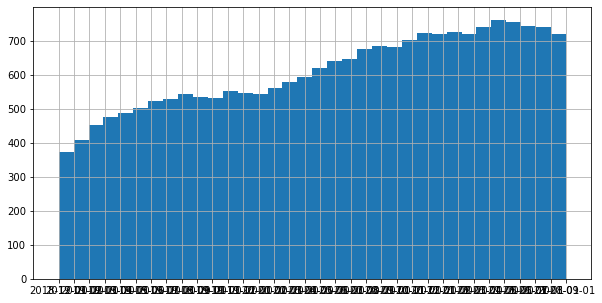

In [20]:
sales_res['Months'].hist(bins= 34, figsize=(10, 5))

array([[<AxesSubplot:title={'center':'Total Sales'}>]], dtype=object)

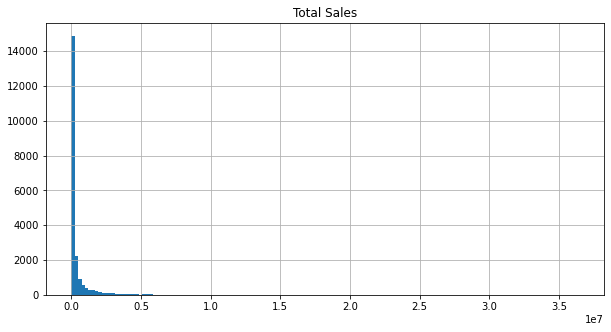

In [68]:
sales_res.loc[:,['Brand', 'Total Sales']].hist(bins= 150, figsize=(10, 5))

# 3. Basic statistics on your variables including correlations with labels 

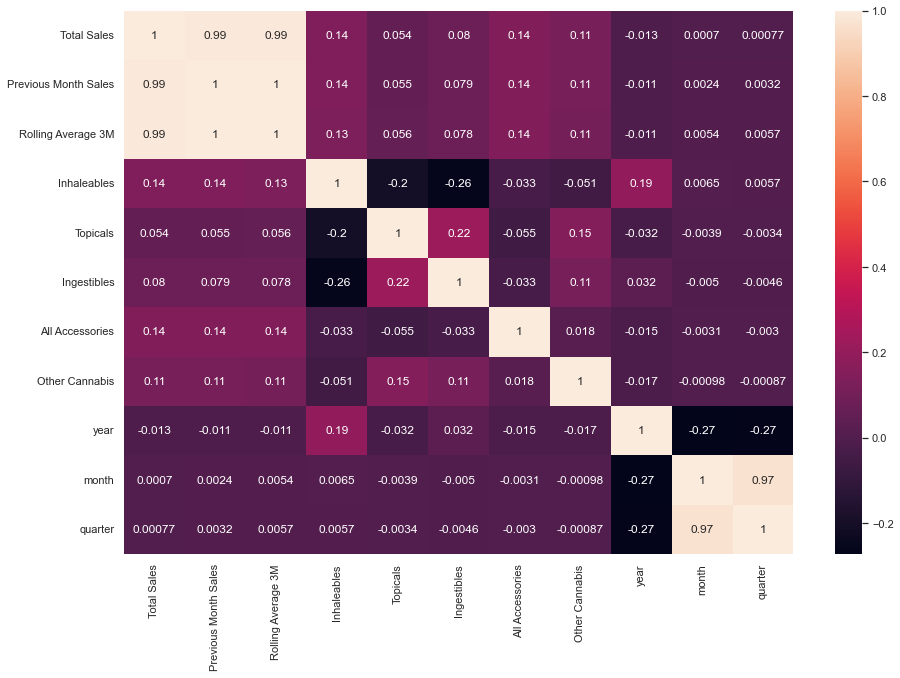

In [212]:
import matplotlib.pyplot as plt
import seaborn as sn
sn.set()
# Plot correlation matrix using seaborn heatmap
# Now that I found I did something that has been done 
# since there are 1 correlations
import seaborn as sn
corr_matrix = sales_res.corr()
sn.set(rc={'figure.figsize':(15,10)})
sn.heatmap(corr_matrix, annot=True)
plt.show()

# 4-5. Building and Implementing Pipeline
- Train/test set split: use September, 2021 as test set
- Drop the brand and month
- Encoding time related features

## 1. Train/test set split

In [21]:
df_test = sales_res[sales_res['Months'] == '2021-09-01']
df_test.head()

Months             Brand   Total Sales  Previous Month Sales  \
24509  2021-09-01          710 Labs  1.073359e+06          1.101215e+06   
24512  2021-09-01     A&A Craft Inc  1.518089e+03          1.335048e+03   
24513  2021-09-01      AA Packaging  2.406840e+03          2.703964e+03   
24515  2021-09-01  Absolute Xtracts  3.773914e+06          4.153207e+06   
24522  2021-09-01           AiroPro  8.146604e+04          1.118307e+05   

       Rolling Average 3M  Inhaleables  Topicals  Ingestibles  \
24509        1.312819e+06            1         0            1   
24512        4.213028e+03            0         0            0   
24513        2.152084e+03            0         0            0   
24515        4.522155e+06            1         0            1   
24522        9.538514e+04            1         0            0   

       All Accessories  Other Cannabis  year  month  quarter  
24509                1               0  2021      9        3  
24512                1               0  2021      9        3  
24513                1               0  2021      9        3  
24515                1               0  2021      9        3  
24522                1               0  2021      9        3

In [22]:
df_train = sales_res[sales_res['Months'] != '2021-09-01']

In [23]:
print('original length=', len(sales_res))
print('test set length=', len(df_test))
print('test set length=', len(df_train))

original length= 20734
test set length= 721
test set length= 20013


In [24]:
y_train = df_train['Total Sales']
X_train = df_train.drop('Total Sales', axis=1)

y_test = df_test['Total Sales']
X_test = df_test.drop('Total Sales', axis=1)

print('df_train shape: ', df_train.shape)
print('X_train shape: ', X_train.shape)
print('y_train shape: ', y_train.shape)
print('X_test shape: ', X_test.shape)
print('y_test shape: ', y_test.shape)

df_train shape:  (20013, 13)
X_train shape:  (20013, 12)
y_train shape:  (20013,)
X_test shape:  (721, 12)
y_test shape:  (721,)


In [25]:
X_train.head().columns

Index(['Months', 'Brand', 'Previous Month Sales', 'Rolling Average 3M',
       'Inhaleables', 'Topicals', 'Ingestibles', 'All Accessories',
       'Other Cannabis', 'year', 'month', 'quarter'],
      dtype='object')

## 2. Pipeline
- Categorical features: One-hot encoding 
- Numerical features: Standard Scaler

In [26]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

categorical_features = ['Inhaleables', 'Topicals', 'Ingestibles',
       'All Accessories', 'Other Cannabis', 'year', 'month', 'quarter']
numerical_features = ['Previous Month Sales', 'Rolling Average 3M']

num_pipeline = Pipeline([
        ('std_scaler', StandardScaler()),
    ])

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, numerical_features), 
        ("cat", OneHotEncoder(), categorical_features),  
    ])



# 7. Implement a basic Linear Regression predictive model
- Obtain statistical metrics using OLS regression
- Train linear regression model and test performance

In [27]:
# Don't run this twice when haven't reset X_train and X_test
X_train = full_pipeline.fit_transform(X_train)
X_test = full_pipeline.transform(X_test)

In [28]:
print(X_train.shape)
print(X_test.shape)


(20013, 32)
(721, 32)


## Statistical Metrics

In [219]:
import statsmodels.api as sm

label=sales_res['Total Sales']
predictors=sales_res.drop('Total Sales', axis=1)

predictors = full_pipeline.fit_transform(predictors)
sales_stats = sm.OLS(label, predictors)

results_stats = sales_stats.fit()
print(results_stats.summary())

                            OLS Regression Results                            
Dep. Variable:            Total Sales   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                 7.311e+04
Date:                Sun, 28 Nov 2021   Prob (F-statistic):               0.00
Time:                        19:31:36   Log-Likelihood:            -2.8175e+05
No. Observations:               20734   AIC:                         5.635e+05
Df Residuals:                   20712   BIC:                         5.637e+05
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1           1.41e+06   1.64e+04     86.242      0.0

## Run Linear Regression model

In [215]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

coeff_df = pd.DataFrame(lin_reg.coef_,columns=['Coefficient'])
coeff_df.sort_values('Coefficient')

Coefficient
17 -3.397158e+17
16 -3.397158e+17
18 -3.397158e+17
25 -1.586525e+17
26 -1.586525e+17
27 -1.586525e+17
29 -7.094281e+16
2  -5.897738e+16
3  -5.897738e+16
24 -4.764551e+16
23 -4.764551e+16
22 -4.764551e+16
1   2.656063e+05
0   1.397550e+06
8   4.037680e+16
9   4.037680e+16
10  5.510962e+16
11  5.510962e+16
30  6.709799e+16
21  9.039530e+16
19  9.039530e+16
20  9.039530e+16
5   9.041044e+16
4   9.041044e+16
6   1.445300e+17
7   1.445300e+17
31  1.781050e+17
28  3.591683e+17
15  1.399252e+18
13  1.399252e+18
14  1.399252e+18
12  1.399252e+18

<AxesSubplot:xlabel='index', ylabel='Coefficient'>

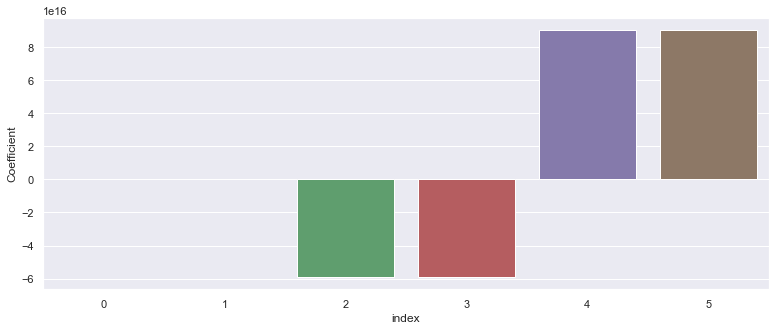

In [216]:
coeff_df['index'] = coeff_df.index
sn.set(rc={'figure.figsize':(13,5)})
sn.barplot(data=coeff_df[0:6], x='index', y='Coefficient')

<AxesSubplot:xlabel='index', ylabel='Coefficient'>

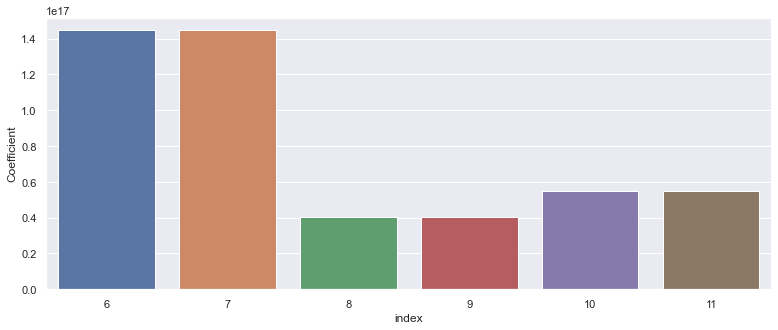

In [217]:
sn.barplot(data=coeff_df[6:12], x='index', y='Coefficient')

<AxesSubplot:xlabel='index', ylabel='Coefficient'>

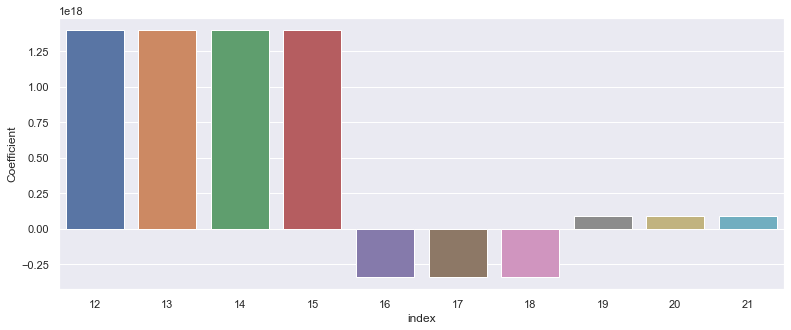

In [218]:
sn.barplot(data=coeff_df[12:22], x='index', y='Coefficient')

<AxesSubplot:xlabel='True Values', ylabel='Predicted Values'>

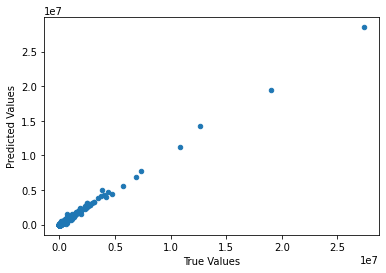

In [27]:
pred = lin_reg.predict(X_test)
pd.DataFrame({'True Values': y_test, 'Predicted Values': pred}).plot.scatter(x='True Values', y='Predicted Values')

In [28]:
import sklearn.metrics as metrics
def regression_results(y_true, y_pred):
    # Regression metrics
    explained_variance=metrics.explained_variance_score(y_true, y_pred)
    mean_absolute_error=metrics.mean_absolute_error(y_true, y_pred) 
    mse=metrics.mean_squared_error(y_true, y_pred) 
    median_absolute_error=metrics.median_absolute_error(y_true, y_pred)
    r2=metrics.r2_score(y_true, y_pred)
    print('explained_variance: ', round(explained_variance,4))    
    print('r2: ', round(r2,4))
    print('MAE: ', round(mean_absolute_error,4))
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))
    

In [29]:
regression_results(y_test, pred)

explained_variance:  0.9929
r2:  0.9929
MAE:  62062.7429
MSE:  17195648628.1742
RMSE:  131132.18


In [30]:
result_df = pd.DataFrame({'True Values': y_test, 'Predicted Values': pred})

In [114]:
import matplotlib.pyplot as plt 
x500t = np.linspace(0,500000, 50)
y500t = np.linspace(0,500000, 50)
x25m = np.linspace(0,25000000, 50)
y25m = np.linspace(0,25000000, 50)
x10t = np.linspace(0,10000, 50)
y10t = np.linspace(0,10000, 50)

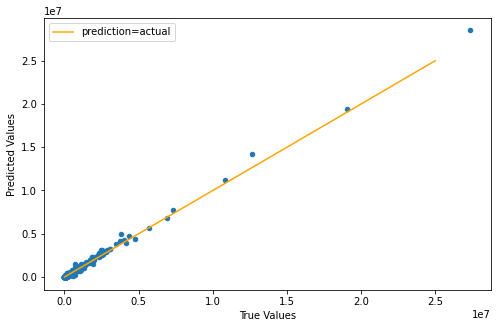

In [35]:
pred = lin_reg.predict(X_test)
df = pd.DataFrame({"x":x25m, "y":y25m})
ax = pd.DataFrame({'True Values': y_test, 'Predicted Values': pred}).plot.scatter(x="True Values", y='Predicted Values',figsize =(8,5))
df.plot(x="x",y="y",color="orange",label="prediction=actual", ax=ax,xlabel='True Values')
plt.show()

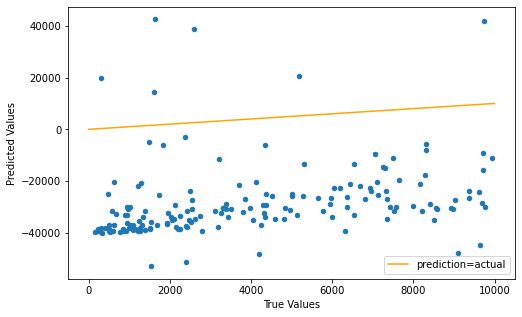

In [88]:
df = pd.DataFrame({"x":x10t, "y":y10t})
ax = result_df[result_df['True Values']<=10000].plot.scatter(x='True Values', y='Predicted Values',figsize =(8,5))
df.plot(x="x",y="y",color="orange",label="prediction=actual", ax=ax,xlabel='True Values')
plt.show()

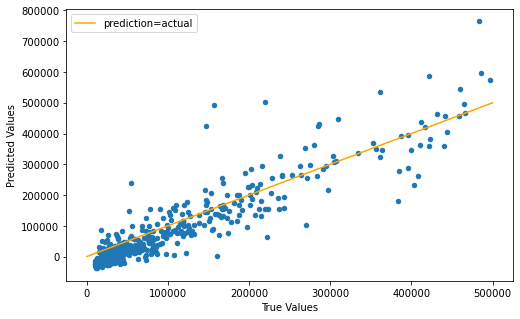

In [115]:
df = pd.DataFrame({"x":x500t, "y":y500t})
ax = result_df[(result_df['True Values']>=10000)&(result_df['True Values']<=500000)].plot.scatter(x='True Values', y='Predicted Values',figsize =(8,5))
df.plot(x="x",y="y",color="orange",label="prediction=actual", ax=ax,xlabel='True Values')
plt.show()

In [220]:
print('r2 when True value less than 10,000: ', r2_score(result_df[result_df['True Values']<10000]['True Values'], result_df[result_df['True Values']<10000]['Predicted Values']))
print('r2 when True value between 10,000 and 500,000: ', r2_score(result_df[(result_df['True Values']>=10000)&(result_df['True Values']<=500000)]['True Values'], result_df[(result_df['True Values']>=10000)&(result_df['True Values']<=500000)]['Predicted Values']))
print('r2 when True value greater than 500,000: ', r2_score(result_df[result_df['True Values']>500000]['True Values'], result_df[result_df['True Values']>500000]['Predicted Values']))

r2 when True value less than 10,000:  -141.2543645524667
r2 when True value between 10,000 and 500,000:  0.7517769183719873
r2 when True value greater than 500,000:  0.991736052561233


# 8. Implement Principle Component Analysis (PCA)

In [225]:
from sklearn.decomposition import PCA
n_comp = 6
column_name_list = ['component '+str(i+1) for i in range(n_comp)]
pca = PCA(n_components=n_comp)

# Fit the model on training set
principalComponents = pca.fit_transform(X_train)

# Construct datafram with column names
X_train_pred_pca = pd.DataFrame(data = principalComponents
             , columns = column_name_list, index=X_train.index)

principalComponents = pca.transform(X_test)
X_test_pred_pca = pd.DataFrame(data = principalComponents
             , columns = column_name_list, index=X_test.index)

In [227]:
 finalDf = pd.concat([X_train_pred_pca, y_train], axis = 1)
finalDf.head()

component 1  component 2  component 3  component 4  component 5  \
1473    -0.475854     0.487833    -0.708946     0.425576     0.210258   
2004    -0.477216     0.533206     0.046006     0.329635     1.198345   
2540    -0.482744     0.534717     0.048123     0.326547     1.205896   
3096    -0.484518     0.532492     0.047602     0.323700     1.209449   
3664    -0.484733     0.489511     0.157399     1.384449     0.073591   

      component 6   Total Sales  
1473    -0.416998  11862.458300  
2004    -0.580144   3999.035200  
2540    -0.586723   2417.479970  
3096    -0.590732   1607.563310  
3664    -0.115138    292.135879

## Rerun linear regression on the after-PCA features

In [229]:
X_test_pred_pca.columns

Index(['component 1', 'component 2', 'component 3', 'component 4',
       'component 5', 'component 6'],
      dtype='object')

In [230]:
from sklearn.linear_model import LinearRegression

lin_reg_pca = LinearRegression(normalize=True)
lin_reg_pca.fit(X_train_pred_pca,y_train)
coeff_pca_df = pd.DataFrame(lin_reg_pca.coef_, X_train_pred_pca.columns, columns=['Coefficient'])
coeff_pca_df

Coefficient
component 1  1.170142e+06
component 2  3.935223e+04
component 3 -8.960635e+03
component 4  2.813706e+04
component 5  2.102207e+04
component 6 -5.814804e+03

In [231]:
# Make predictions
y_pca_pred = lin_reg_pca.predict(X_test_pred_pca)

result_pca_df = pd.DataFrame({'True Values': y_test, 'Predicted Values': y_pca_pred})
result_pca_df['diff'] = result_pca_df['True Values'] - result_pca_df['Predicted Values']
result_pca_df['diff_percentage'] = result_pca_df['Predicted Values'] / result_pca_df['True Values'] -1
result_pca_df.head(2)

True Values  Predicted Values           diff  diff_percentage
24509  1.073359e+06      1.347294e+06 -273934.903638         0.255213
24512  1.518089e+03      1.814418e+04  -16626.090941        10.951988

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


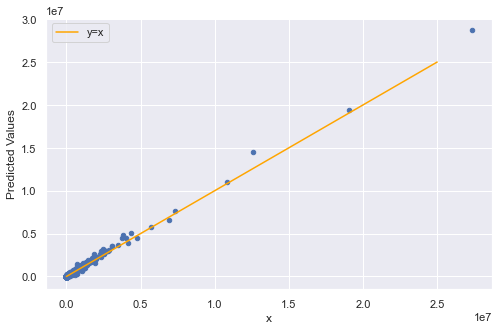

In [232]:
import matplotlib.pyplot as plt

x500t = np.linspace(0,500000, 50)
y500t = np.linspace(0,500000, 50)
x25m = np.linspace(0,25000000, 50)
y25m = np.linspace(0,25000000, 50)
x10t = np.linspace(0,10000, 50)
y10t = np.linspace(0,10000, 50)

# Over all predictions
df = pd.DataFrame({"x":x25m, "y":y25m})
ax = pd.DataFrame({'True Values': y_test, 'Predicted Values': y_pca_pred}).plot.scatter(x='True Values', y='Predicted Values',figsize =(8,5))
df.plot(x="x",y="y",color="orange",label="y=x", ax=ax)
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


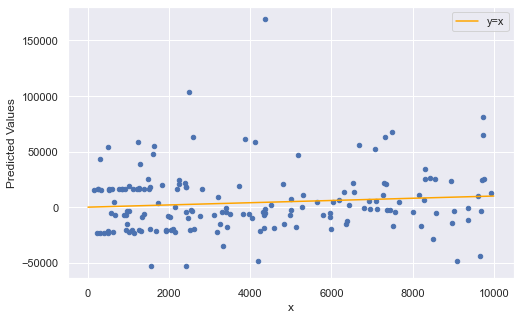

In [233]:
df = pd.DataFrame({"x":x10t, "y":y10t})
ax = result_pca_df[result_pca_df['True Values']<=10000].plot.scatter(x='True Values', y='Predicted Values',figsize =(8,5))
df.plot(x="x",y="y",color="orange",label="y=x", ax=ax)
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


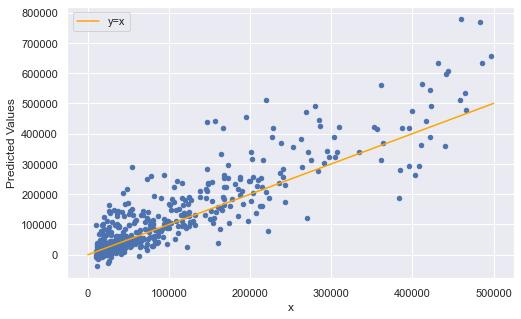

In [234]:

df = pd.DataFrame({"x":x500t, "y":y500t})
ax = result_pca_df[(result_pca_df['True Values']>=10000)&(result_pca_df['True Values']<=500000)].plot.scatter(x='True Values', y='Predicted Values',figsize =(8,5))
df.plot(x="x",y="y",color="orange",label="y=x", ax=ax)
plt.show()

In [235]:
print('r2 when True value less than 10,000: ', r2_score(result_pca_df[result_pca_df['True Values']<10000]['True Values'], result_pca_df[result_pca_df['True Values']<10000]['Predicted Values']))
print('r2 when True value between 10,000 and 500,000: ', r2_score(result_pca_df[(result_pca_df['True Values']>=10000)&(result_pca_df['True Values']<=500000)]['True Values'], result_pca_df[(result_pca_df['True Values']>=10000)&(result_pca_df['True Values']<=500000)]['Predicted Values']))
print('r2 when True value greater than 500,000: ', r2_score(result_pca_df[result_pca_df['True Values']>500000]['True Values'], result_pca_df[result_pca_df['True Values']>500000]['Predicted Values']))

r2 when True value less than 10,000:  -93.1745877897855
r2 when True value between 10,000 and 500,000:  0.5944322263834472
r2 when True value greater than 500,000:  0.9880614796001702



# 9. Employ an ensemble method- Random Forest model
# 10. Cross-Validation
Merged with the  process of GridSearch 
# 11. Employ a GridSearch method to optimize your parameters


## Gridsearch



In [31]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators':[30,40,50,80,100],'max_depth':[5,8,10,12,15,20,25]},  
]

forest_reg = RandomForestRegressor(oob_score=True ,n_jobs=-1, random_state=42)
grid_search = GridSearchCV(forest_reg, param_grid, cv=10,
                          scoring='neg_mean_squared_error',
                          return_train_score=True)

grid_search.fit(X_train,y_train)

GridSearchCV(cv=10,
             estimator=RandomForestRegressor(n_jobs=-1, oob_score=True,
                                             random_state=42),
             param_grid=[{'max_depth': [5, 8, 10, 12, 15, 20, 25],
                          'n_estimators': [30, 40, 50, 80, 100]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [79]:
grid_search.best_estimator_


RandomForestRegressor(max_depth=15, n_estimators=40, n_jobs=-1, oob_score=True,
                      random_state=42)

In [81]:
forest_reg_optimize = RandomForestRegressor(n_estimators=40 ,max_depth=15 ,oob_score=True ,n_jobs=-1, random_state=42)
forest_reg_optimize.fit(X_train_prepared,y_train)
pred_1 = forest_reg_optimize.predict(X_test)

In [99]:
regression_results(y_test, pred_1)

explained_variance:  0.9922
r2:  0.9919
MAE:  56387.0258
MSE:  19604199813.1873
RMSE:  140014.9985


In [45]:
result_df_1 = pd.DataFrame({'True Values': y_test, 'Predicted Values': pred_1})

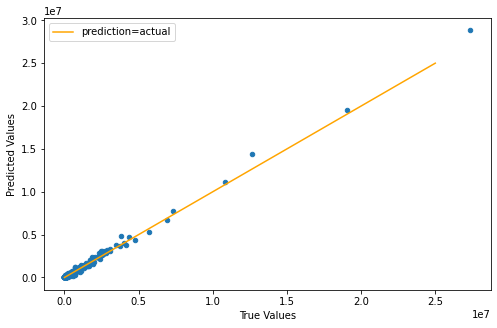

In [95]:

x500t = np.linspace(0,500000, 50)
y500t = np.linspace(0,500000, 50)
x25m = np.linspace(0,25000000, 50)
y25m = np.linspace(0,25000000, 50)
x10t = np.linspace(0,10000, 50)
y10t = np.linspace(0,10000, 50)

df = pd.DataFrame({"x":x25m, "y":y25m})
ax = pd.DataFrame({'True Values': y_test, 'Predicted Values': pred_1}).plot.scatter(x='True Values', y='Predicted Values',figsize =(8,5))
df.plot(x="x",y="y",color="orange",label="prediction=actual", ax=ax,xlabel='True Values')
plt.show()

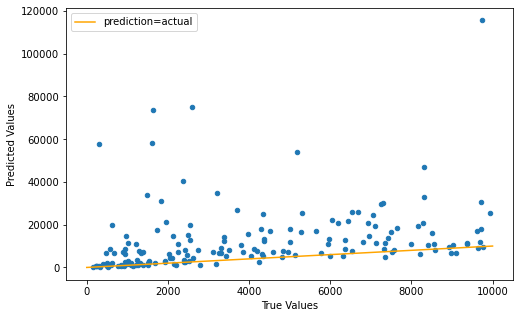

In [96]:
df = pd.DataFrame({"x":x10t, "y":y10t})
ax = result_df_1[result_df_1['True Values']<=10000].plot.scatter(x='True Values', y='Predicted Values',figsize =(8,5))
df.plot(x="x",y="y",color="orange",label="prediction=actual", ax=ax,xlabel='True Values')
plt.show()

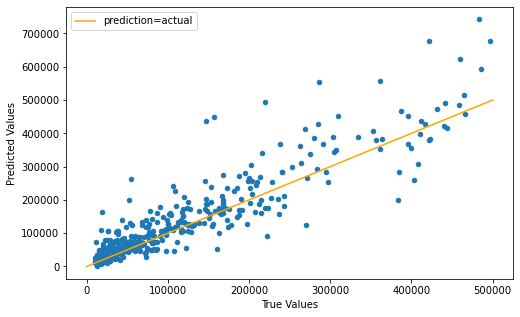

In [97]:
df = pd.DataFrame({"x":x500t, "y":y500t})
ax = result_df_1[(result_df_1['True Values']>=10000)&(result_df_1['True Values']<=500000)].plot.scatter(x='True Values', y='Predicted Values',figsize =(8,5))
df.plot(x="x",y="y",color="orange",label="prediction=actual", ax=ax,xlabel='True Values')
plt.show()

In [49]:
print('r2 when True value less than 10,000: ', r2_score(result_df_1[result_df_1['True Values']<10000]['True Values'], result_df_1[result_df_1['True Values']<10000]['Predicted Values']))
print('r2 when True value between 10,000 and 500,000: ', r2_score(result_df_1[(result_df_1['True Values']>=10000)&(result_df_1['True Values']<=500000)]['True Values'], result_df_1[(result_df_1['True Values']>=10000)&(result_df_1['True Values']<=500000)]['Predicted Values']))
print('r2 when True value greater than 500,000: ', r2_score(result_df_1[result_df_1['True Values']>500000]['True Values'], result_df_1[result_df_1['True Values']>500000]['Predicted Values']))

r2 when True value less than 10,000:  -31.997669333403834
r2 when True value between 10,000 and 500,000:  0.749050769090626
r2 when True value greater than 500,000:  0.9903026508558215


# 12. Experiment with custom models and report out your highest performing model
## Segmented regression

In [99]:
testset = sales_res[sales_res['Months'] == '2021-09-01']
testset.head()

Months             Brand   Total Sales  Previous Month Sales  \
24509  2021-09-01          710 Labs  1.073359e+06          1.101215e+06   
24512  2021-09-01     A&A Craft Inc  1.518089e+03          1.335048e+03   
24513  2021-09-01      AA Packaging  2.406840e+03          2.703964e+03   
24515  2021-09-01  Absolute Xtracts  3.773914e+06          4.153207e+06   
24522  2021-09-01           AiroPro  8.146604e+04          1.118307e+05   

       Rolling Average 3M  Inhaleables  Topicals  Ingestibles  \
24509        1.312819e+06            1         0            1   
24512        4.213028e+03            0         0            0   
24513        2.152084e+03            0         0            0   
24515        4.522155e+06            1         0            1   
24522        9.538514e+04            1         0            0   

       All Accessories  Other Cannabis  year  month  quarter  
24509                1               0  2021      9        3  
24512                1               0  2021      9        3  
24513                1               0  2021      9        3  
24515                1               0  2021      9        3  
24522                1               0  2021      9        3

In [100]:
trainset = sales_res[sales_res['Months'] != '2021-09-01']
trainset.head()

Months            Brand   Total Sales  Previous Month Sales  \
1473  2018-12-01  1964 Supply Co.  11862.458300            5402.87306   
2004  2019-01-01  1964 Supply Co.   3999.035200           11862.45830   
2540  2019-02-01  1964 Supply Co.   2417.479970            3999.03520   
3096  2019-03-01  1964 Supply Co.   1607.563310            2417.47997   
3664  2019-04-01  1964 Supply Co.    292.135879            1607.56331   

      Rolling Average 3M  Inhaleables  Topicals  Ingestibles  All Accessories  \
1473        14830.434353            0         0            0                0   
2004        10292.848487            0         0            0                0   
2540         7088.122187            0         0            0                0   
3096         6092.991157            0         0            0                0   
3664         2674.692827            0         0            0                0   

      Other Cannabis  year  month  quarter  
1473               0  2018     12        4  
2004               0  2019      1        1  
2540               0  2019      2        1  
3096               0  2019      3        1  
3664               0  2019      4        2

In [156]:
testset1 = testset[testset['Previous Month Sales'] <= 10000]
testset2 = testset[testset['Previous Month Sales'] > 10000]

trainset1 = trainset[trainset['Previous Month Sales'] <= 10000]
trainset2 = trainset[trainset['Previous Month Sales'] > 10000]

In [157]:
y_train_1 = trainset1['Total Sales']
y_train_2 = trainset2['Total Sales']
X_train_1 = trainset1.drop('Total Sales', axis=1)
X_train_2 = trainset2.drop('Total Sales', axis=1)

y_test_1 = testset1['Total Sales']
y_test_2 = testset2['Total Sales']
X_test_1 = testset1.drop('Total Sales', axis=1)
X_test_2 = testset2.drop('Total Sales', axis=1)


print('X_train_1 shape: ', X_train_1.shape)
print('X_train_2 shape: ', X_train_2.shape)
print('y_train_1 shape: ', y_train_1.shape)
print('y_train_2 shape: ', y_train_2.shape)
print('X_test_1 shape: ', X_test_1.shape)
print('X_test_2 shape: ', X_test_2.shape)
print('y_test_1 shape: ', y_test_1.shape)
print('y_test_2 shape: ', y_test_2.shape)

X_train_1 shape:  (3419, 12)
X_train_2 shape:  (16594, 12)
y_train_1 shape:  (3419,)
y_train_2 shape:  (16594,)
X_test_1 shape:  (146, 12)
X_test_2 shape:  (575, 12)
y_test_1 shape:  (146,)
y_test_2 shape:  (575,)


In [158]:
X_train_1 = full_pipeline.fit_transform(X_train_1)
X_train_2 = full_pipeline.fit_transform(X_train_2)
X_test_1 = full_pipeline.transform(X_test_1)
X_test_2 = full_pipeline.transform(X_test_2)

print(X_train_1.shape)
print(X_train_2.shape)
print(X_test_1.shape)
print(X_test_2.shape)

(3419, 32)
(16594, 32)
(146, 32)
(575, 32)


[14:21:19] WARNING: ..\src\learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




<AxesSubplot:xlabel='True Values', ylabel='Predicted Values'>

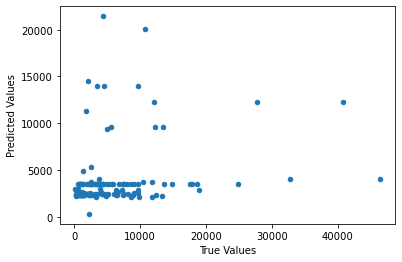

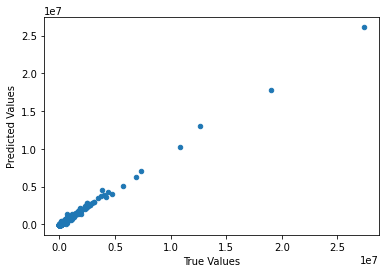

In [187]:
from sklearn.linear_model import LinearRegression
# linear regression
lin_reg1 = LinearRegression()
lin_reg1.fit(X_train_1,y_train_1)
pred1 = lin_reg.predict(X_test_1)
#Random Forest 
forest_reg = RandomForestRegressor(n_estimators=40 ,max_depth=15 ,oob_score=True ,n_jobs=-1, random_state=42)
forest_reg.fit(X_train_1,y_train_1)
pred1 = forest_reg.predict(X_test_1)
#Xgboost
import xgboost as xgb
dtrain = xgb.DMatrix(X_train_1,y_train_1)
dtest = xgb.DMatrix(X_test_1)
params = {
    'booster': 'gbtree',
    'objective': 'reg:squarederror',
    'gamma': 0.1,
    'max_depth': 5,
    'lambda': 3,
    'subsample': 0.7,
    'colsample_bytree': 0.7,
    'min_child_weight': 3,
    'silent': 1,
    'eta': 0.1,
    'seed': 1000,
    'nthread': 4
}

num_rounds = 500
model = xgb.train(params, dtrain, num_rounds) 
pred1 = model.predict(dtest)

lin_reg2 = LinearRegression()
lin_reg2.fit(X_train_2,y_train_2)
pred2 = lin_reg.predict(X_test_2)

pd.DataFrame({'True Values': y_test_1, 'Predicted Values': pred1}).plot.scatter(x='True Values', y='Predicted Values')
pd.DataFrame({'True Values': y_test_2, 'Predicted Values': pred2}).plot.scatter(x='True Values', y='Predicted Values')

## Linear Regression Result

In [175]:
regression_results(y_test_1, pred1)
regression_results(y_test_2, pred2)

explained_variance:  -0.1139
r2:  -150.8929
MAE:  86255.3195
MSE:  7494941573.5263
RMSE:  86573.3306
explained_variance:  0.9944
r2:  0.992
MAE:  103313.8966
MSE:  23729819447.6211
RMSE:  154044.8618


In [177]:
result1 = pd.DataFrame({'True Values': y_test_1, 'Predicted Values': pred1})
result2 = pd.DataFrame({'True Values': y_test_2, 'Predicted Values': pred2})

In [178]:
import matplotlib.pyplot as plt 
x1 = np.linspace(0,10000, 50)
y1 = np.linspace(0,10000, 50)
x2 = np.linspace(10000,25000000, 50)
y2 = np.linspace(10000,25000000, 50)

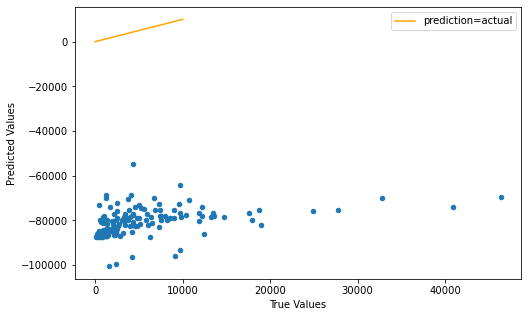

In [179]:
df = pd.DataFrame({"x":x1, "y":y1})
ax = result1.plot.scatter(x='True Values', y='Predicted Values',figsize =(8,5))
df.plot(x="x",y="y",color="orange",label="prediction=actual", ax=ax,xlabel='True Values')
plt.show()

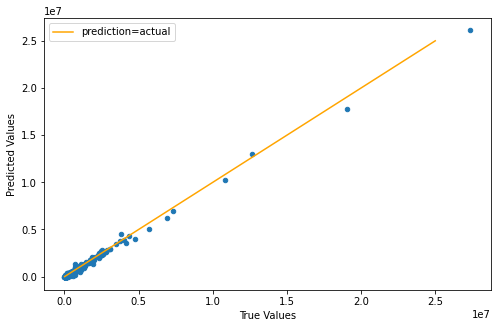

In [180]:
df = pd.DataFrame({"x":x2, "y":y2})
ax = result2.plot.scatter(x='True Values', y='Predicted Values',figsize =(8,5))
df.plot(x="x",y="y",color="orange",label="prediction=actual", ax=ax,xlabel='True Values')
plt.show()

## Random Forest Result

In [182]:
regression_results(y_test_1, pred1)
regression_results(y_test_2, pred2)

explained_variance:  0.0865
r2:  0.0733
MAE:  4129.0694
MSE:  45724951.4815
RMSE:  6762.0227
explained_variance:  0.9944
r2:  0.992
MAE:  103313.8966
MSE:  23729819447.6211
RMSE:  154044.8618


In [183]:
result1 = pd.DataFrame({'True Values': y_test_1, 'Predicted Values': pred1})
result2 = pd.DataFrame({'True Values': y_test_2, 'Predicted Values': pred2})

In [184]:
import matplotlib.pyplot as plt 
x1 = np.linspace(0,10000, 50)
y1 = np.linspace(0,10000, 50)
x2 = np.linspace(10000,25000000, 50)
y2 = np.linspace(10000,25000000, 50)

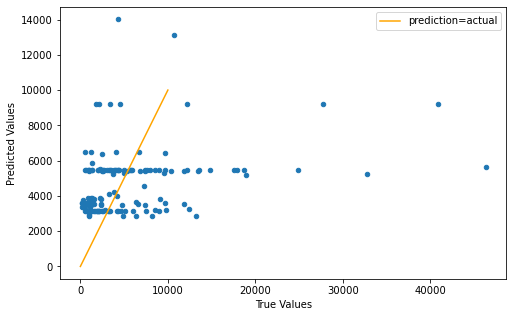

In [185]:
df = pd.DataFrame({"x":x1, "y":y1})
ax = result1.plot.scatter(x='True Values', y='Predicted Values',figsize =(8,5))
df.plot(x="x",y="y",color="orange",label="prediction=actual", ax=ax,xlabel='True Values')
plt.show()

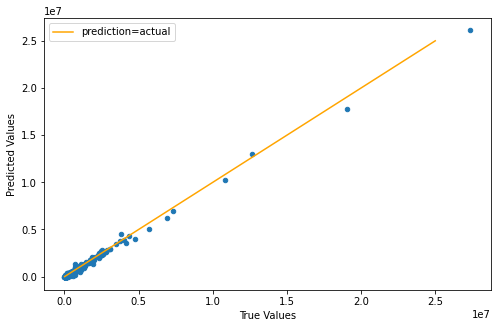

In [186]:
df = pd.DataFrame({"x":x2, "y":y2})
ax = result2.plot.scatter(x='True Values', y='Predicted Values',figsize =(8,5))
df.plot(x="x",y="y",color="orange",label="prediction=actual", ax=ax,xlabel='True Values')
plt.show()

## XGboost Result

In [188]:
regression_results(y_test_1, pred1)
regression_results(y_test_2, pred2)

explained_variance:  0.0198
r2:  -0.0379
MAE:  4114.8023
MSE:  51215263.2919
RMSE:  7156.484
explained_variance:  0.9944
r2:  0.992
MAE:  103313.8966
MSE:  23729819447.6211
RMSE:  154044.8618


In [189]:
result1 = pd.DataFrame({'True Values': y_test_1, 'Predicted Values': pred1})
result2 = pd.DataFrame({'True Values': y_test_2, 'Predicted Values': pred2})

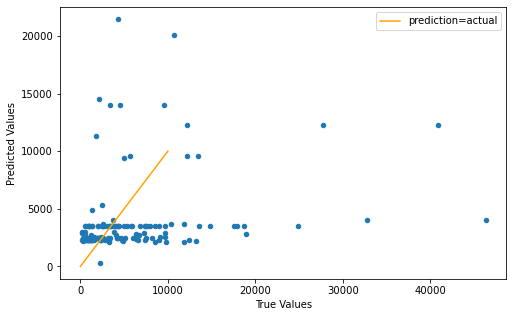

In [190]:
df = pd.DataFrame({"x":x1, "y":y1})
ax = result1.plot.scatter(x='True Values', y='Predicted Values',figsize =(8,5))
df.plot(x="x",y="y",color="orange",label="prediction=actual", ax=ax,xlabel='True Values')
plt.show()

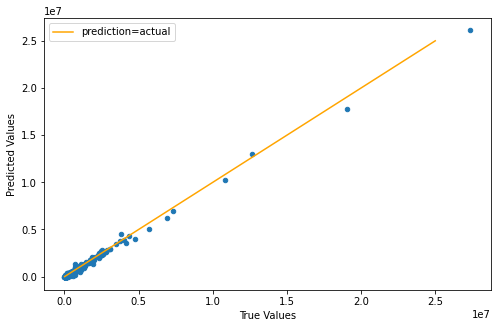

In [191]:
df = pd.DataFrame({"x":x2, "y":y2})
ax = result2.plot.scatter(x='True Values', y='Predicted Values',figsize =(8,5))
df.plot(x="x",y="y",color="orange",label="prediction=actual", ax=ax,xlabel='True Values')
plt.show()

## Xgboost model
Run Xgbosst model on the whole dataset and report performance

In [199]:
import xgboost as xgb
dtrain = xgb.DMatrix(X_train,y_train)
dtest = xgb.DMatrix(X_test)
params = {
    'booster': 'gbtree',
    'objective': 'reg:squarederror',
    'gamma': 0.1,
    'max_depth': 5,
    'lambda': 3,
    'subsample': 0.7,
    'colsample_bytree': 0.7,
    'min_child_weight': 3,
    'silent': 1,
    'eta': 0.1,
    'seed': 1000,
    'nthread': 4
}

num_rounds = 500
model = xgb.train(params, dtrain, num_rounds) 
pred1 = model.predict(dtest)


[14:32:42] WARNING: ..\src\learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




In [200]:
regression_results(y_test, pred1)

explained_variance:  0.9941
r2:  0.9941
MAE:  48363.1028
MSE:  14175169806.2314
RMSE:  119059.5221


In [201]:
result_df_1 = pd.DataFrame({'True Values': y_test, 'Predicted Values': pred1})

In [202]:
x500t = np.linspace(0,500000, 50)
y500t = np.linspace(0,500000, 50)
x25m = np.linspace(0,25000000, 50)
y25m = np.linspace(0,25000000, 50)
x10t = np.linspace(0,10000, 50)
y10t = np.linspace(0,10000, 50)

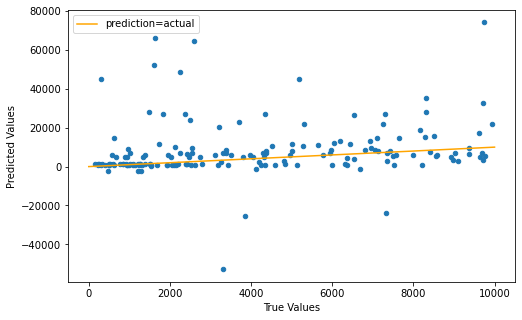

In [203]:
df = pd.DataFrame({"x":x10t, "y":y10t})
ax = result_df_1[result_df_1['True Values']<=10000].plot.scatter(x='True Values', y='Predicted Values',figsize =(8,5))
df.plot(x="x",y="y",color="orange",label="prediction=actual", ax=ax,xlabel='True Values')
plt.show()

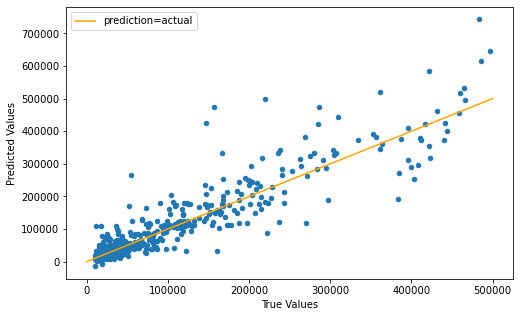

In [204]:
df = pd.DataFrame({"x":x500t, "y":y500t})
ax = result_df_1[(result_df_1['True Values']>=10000)&(result_df_1['True Values']<=500000)].plot.scatter(x='True Values', y='Predicted Values',figsize =(8,5))
df.plot(x="x",y="y",color="orange",label="prediction=actual", ax=ax,xlabel='True Values')
plt.show()

In [205]:
print('r2 when True value less than 10,000: ', r2_score(result_df_1[result_df_1['True Values']<10000]['True Values'], result_df_1[result_df_1['True Values']<10000]['Predicted Values']))
print('r2 when True value between 10,000 and 500,000: ', r2_score(result_df_1[(result_df_1['True Values']>=10000)&(result_df_1['True Values']<=500000)]['True Values'], result_df_1[(result_df_1['True Values']>=10000)&(result_df_1['True Values']<=500000)]['Predicted Values']))
print('r2 when True value greater than 500,000: ', r2_score(result_df_1[result_df_1['True Values']>500000]['True Values'], result_df_1[result_df_1['True Values']>500000]['Predicted Values']))

r2 when True value less than 10,000:  -22.863317754126506
r2 when True value between 10,000 and 500,000:  0.7858634881080933
r2 when True value greater than 500,000:  0.9931252085134511


By comparison,the highest performing model is XGBoosting model